## Decision tree classifier 
- A Decision Tree classifier is a supervised machine learning algorithm that predicts the class of an instance by learning descision rules from data features represented in a tree like structure using nodes, braches and leaves.

### Structure (l-liner)
- Root node - best feature
- Decision nodes - conditions
- Leaf nodes - final class label

(-0.5, 1023.5, 575.5, -0.5)

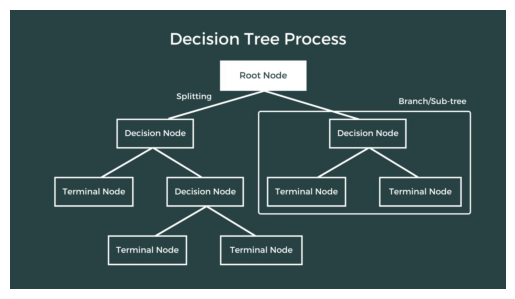

In [3]:
from PIL import Image 
import matplotlib.pyplot as plt 

img = Image.open(r"C:\Users\HP\Downloads\WhatsApp Image 2026-01-31 at 10.35.09 AM.jpeg")
plt.imshow(img)
plt.axis("off")

### Working flow
- step 1 - Take training dataset
- step 2 - Calculate entropy / gini index
- step 3 - compare information gain for each feature
- step 4 - select feature with highest information gain as root 
- step 5 - split dataset
- step 6 - Repeat until
- step 7 - All data is pure (or) features left
- step 8 - Assign class at leaf node

# Random forest classifier:
- A random forest claasifier is an ensemble learning algorithm that builds multiple decision trees using random samples and features, and predicts the final class using majority voting.

### Working Flow:
- Select N random samples from dataset (Bootstrap)
- Build N decision tress
- At each split:
-       random subset of features used
-       Each tree predicts independently
- Final Prediction = majority vote

## Step-1 Import Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Step-2 Create Dataset

In [7]:
data = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Overcast"],
    "Humidity": ["High", "High", "High", "Normal", "Normal", "Normal"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Strong", "Strong"],
    "Play": ["No", "No", "Yes", "Yes", "No", "Yes"]
}

df = pd.DataFrame(data)
print(df)

    Outlook Humidity    Wind Play
0     Sunny     High    Weak   No
1     Sunny     High  Strong   No
2  Overcast     High    Weak  Yes
3      Rain   Normal    Weak  Yes
4      Rain   Normal  Strong   No
5  Overcast   Normal  Strong  Yes


### step-3  Encoded the data

In [10]:
le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

print("\nEncoded Data:\n", df)


Encoded Data:
    Outlook  Humidity  Wind  Play
0        2         0     1     0
1        2         0     0     0
2        0         0     1     1
3        1         1     1     1
4        1         1     0     0
5        0         1     0     1


In [12]:
x = df.drop("Play", axis = 1)
y = df["Play"]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [15]:
x_train

,Outlook,Humidity,Wind
5,0,1,0
2,0,0,1
4,1,1,0
3,1,1,1


In [16]:
y_train

5    1
2    1
4    0
3    1
Name: Play, dtype: int64

In [18]:
model = DecisionTreeClassifier(criterion = "entropy")
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [19]:
y_pred = model.predict(x_test)
print("Predictions:", y_pred)

Predictions: [1 0]


In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


In [23]:
new_data = pd.DataFrame([[2,1,1]], columns = x.columns)
prediction = model.predict(new_data)

print("New Data Prediction:", "Yes" if prediction[0] == 1 else "No")

New Data Prediction: Yes


In [24]:
importances = model.feature_importances_

for feature, importance in zip(x.columns, importances):
    print(f"{feature}: {importance:.3f}")

Outlook: 0.616
Humidity: 0.000
Wind: 0.384


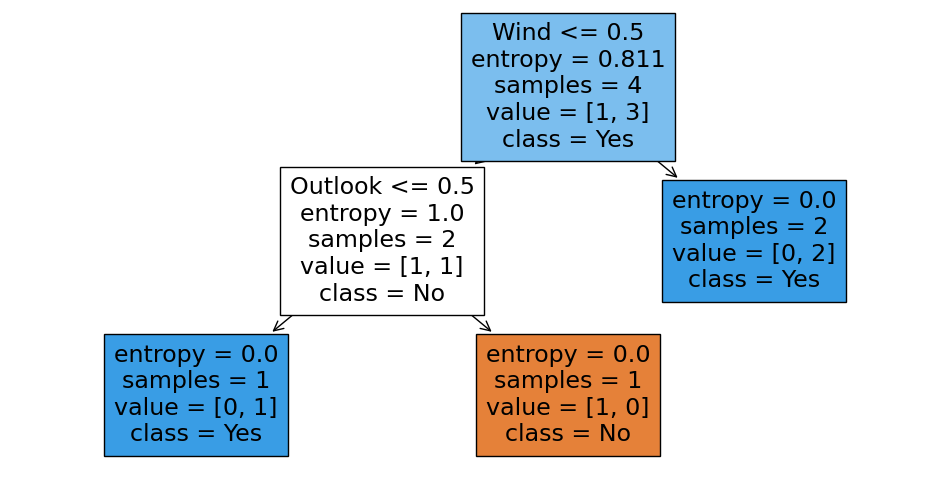

In [29]:
plt.figure(figsize=(12,6))
plot_tree(
    model,
    feature_names =list(x.columns),
    class_names = ["No", "Yes"],
    filled = True
)
plt.show()